In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img=cv2.imread('/content/Dog.jpg')

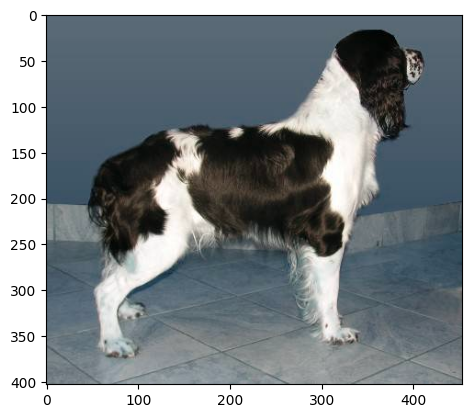

In [5]:
plt.imshow(img)

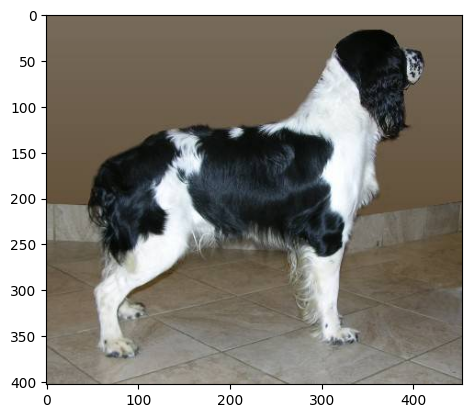

In [8]:
# convert color from BGR to RGB
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

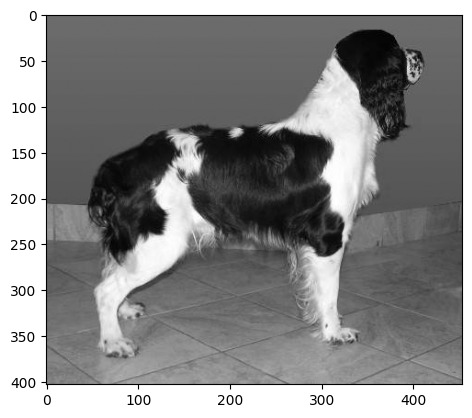

In [9]:
#convert the image from RGB to Grayscale
gray_scale=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_scale,cmap='gray')

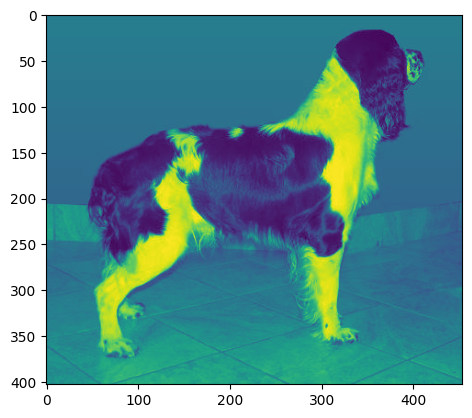

In [11]:
gray_scale1=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_scale)  # image is more of gray scale

In [12]:
print(gray_scale)


[[108 108 108 ... 108 108 108]
 [108 108 108 ... 108 108 108]
 [108 108 108 ... 108 108 108]
 ...
 [122 130 136 ... 126 127 128]
 [125 131 135 ... 128 130 133]
 [128 133 133 ... 131 135 138]]


##### Image Masking

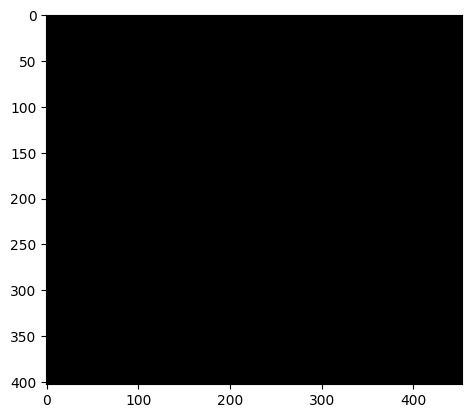

In [15]:
# Image masking ,Seperate the region intrest from original image
mask=np.zeros_like(img)   # same dimention of image
plt.imshow(mask)

In [18]:
# Define Circle
height ,width =img.shape[:2]     # finding height and width of image to find outside shape
#To create circle finding center of image and values
center=(width//2,height//2)
print(center)
radius=min(center[0],center[1])
print(radius)

(227, 201)
201


#### Draw a white Circle


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
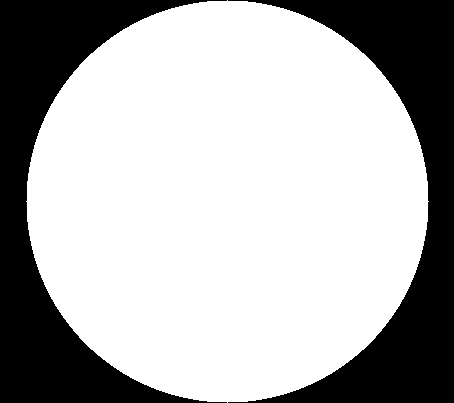

In [19]:
#Draw a white circle
cv2.circle(mask,center,radius,(255,255,255),-1) # drawing white circle on Mask


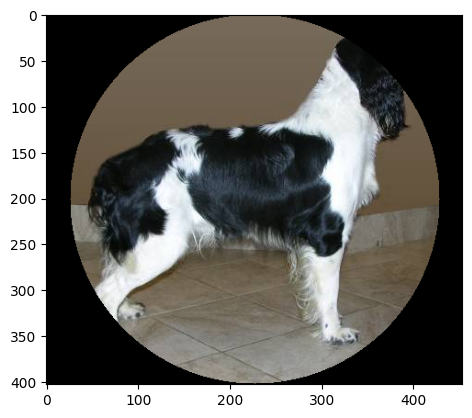

In [20]:
# using a bitwise operator on Mask & Images
masked_img=cv2.bitwise_and(img,mask)
plt.imshow(masked_img)

In [21]:
print(img.shape)

(403, 454, 3)


#### Split into the Color Channels

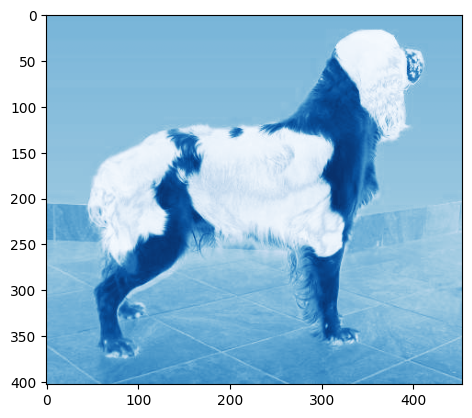

In [24]:
#Split into the color channels
b,g,r=cv2.split(img)
plt.imshow(b , cmap='Blues')

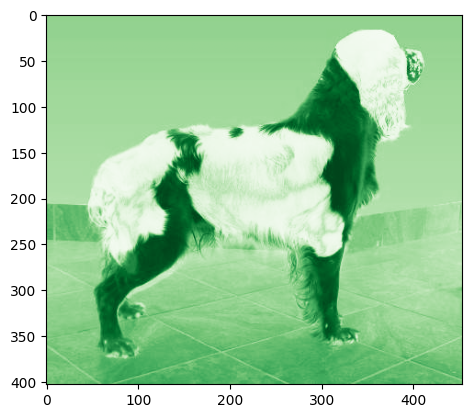

In [26]:
plt.imshow(g , cmap='Greens')

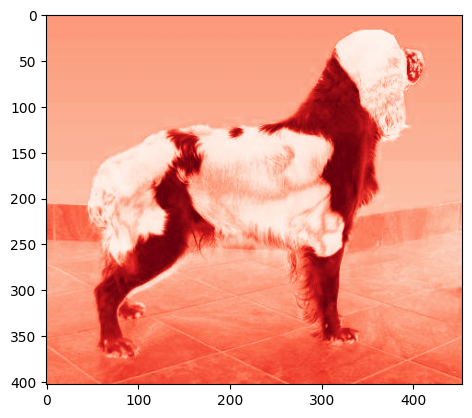

In [27]:
plt.imshow(r , cmap='Reds')

#### Merging Image

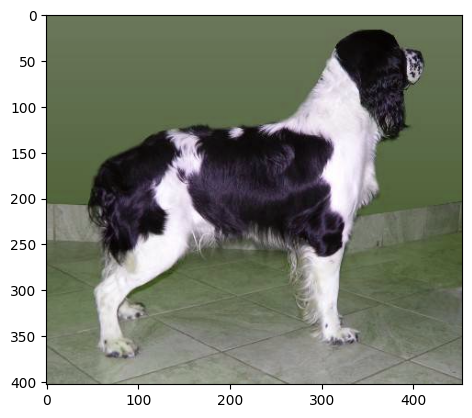

In [31]:
# creating own command to merge image
merged_img_gbr=cv2.merge([g,b,r])
plt.imshow(merged_img_gbr)

#### Color Intensity of Grayscale image

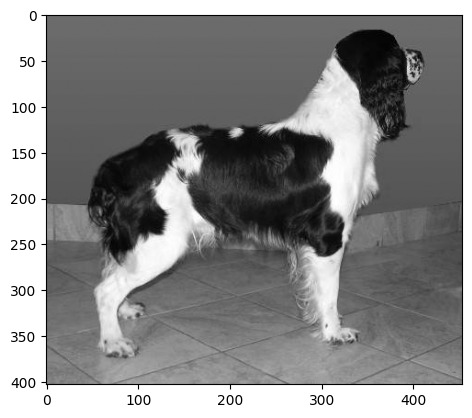

In [32]:
#check the color intensity of gray scale image
plt.imshow(gray_scale,cmap='gray')

#### Plot the Histogram

<ipython-input-38-86bb72222479>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(gray_scale.ravel(),256,[0,256])   # ravel() method is called on this array to "flatten" it into a 1D array. and [0,256]consider values between 0 (inclusive) and 256 (exclusive) and 256 =bins for histogram and each bin will correspond to a single intensity value.


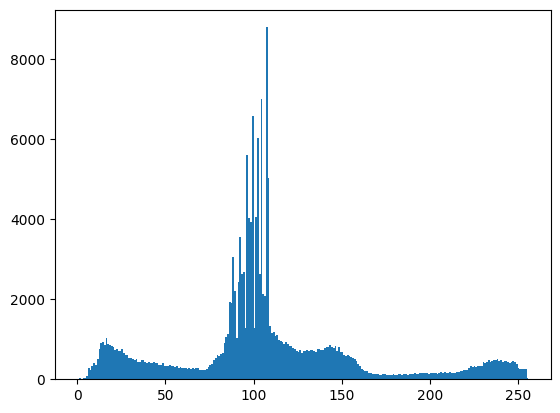

In [38]:
plt.hist(gray_scale.ravel(),256,[0,256])   # ravel() method is called on this array to "flatten" it into a 1D array. and [0,256]consider values between 0 (inclusive) and 256 (exclusive) and 256 =bins for histogram and each bin will correspond to a single intensity value.
plt.show()

####  Histogram for Color Image

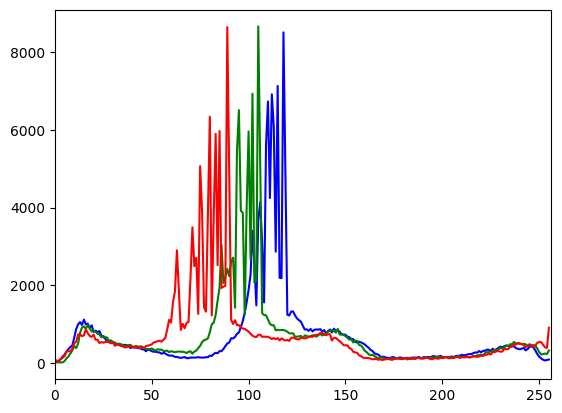

In [41]:
for i,col in enumerate(['b','g','r']):
  hist=cv2.calcHist([img],[i],None,[256],[0,256])
  plt.plot(hist,color=col)
  plt.xlim([0,256])

#### Histogram Equalization

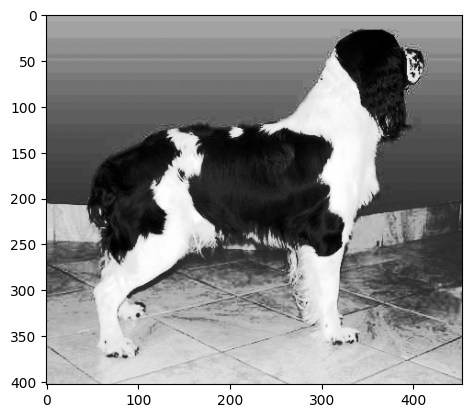

In [42]:
equalized_img=cv2.equalizeHist(gray_scale)
plt.imshow(equalized_img,cmap='gray')

<ipython-input-43-e32ca427340b>:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized_img.ravel(),256,[0,256])


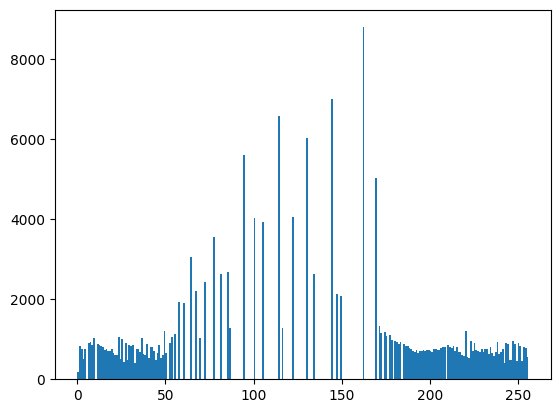

In [43]:
plt.hist(equalized_img.ravel(),256,[0,256])
plt.show()
